## Graph Generator

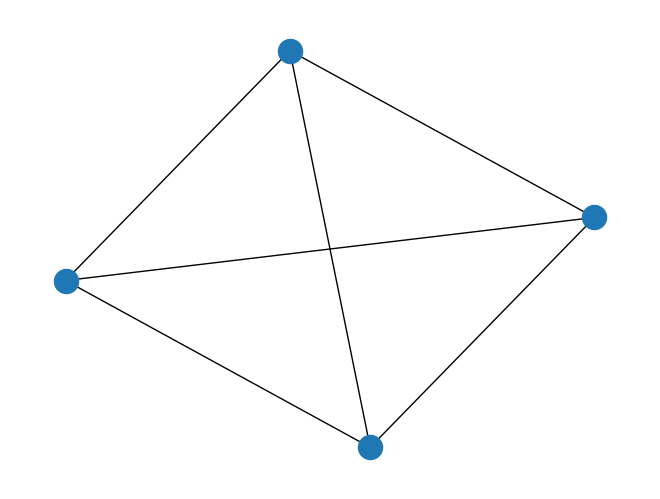

In [3]:
import data.random_graph_generator as rgg 
import networkx as nx
import matplotlib.pyplot as plt

#For the test, let's take a possible range of sizes of graphs 
sizes = range(3,11)

#Erdos-Renyi model generator
ergen = rgg.ERGenerator(sizes) #Let's use alpha = 1.3 the default value
G = ergen.generate()
nx.draw(G)
plt.draw()

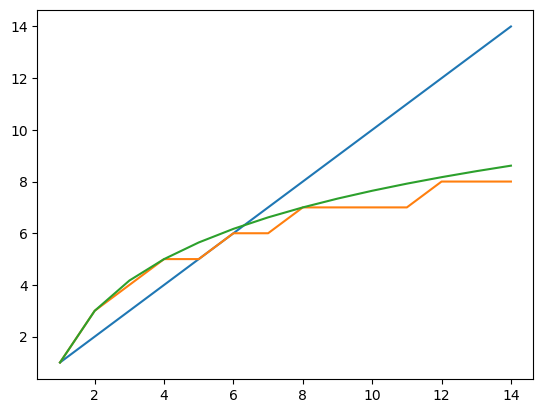

In [2]:
#Original git parameters 
import numpy as np 
import matplotlib.pyplot as plt 
M, FM = [], []
for n in range(1,15) : 
    m = int(2 * np.log2(n))+1
    fm = (2 * np.log2(n)) +1 
    M.append(m)
    FM.append(fm)
    
plt.plot(list(range(1,15)),list(range(1,15)))
plt.plot(list(range(1,15)), M)
plt.plot(list(range(1,15)), FM)
plt.show()

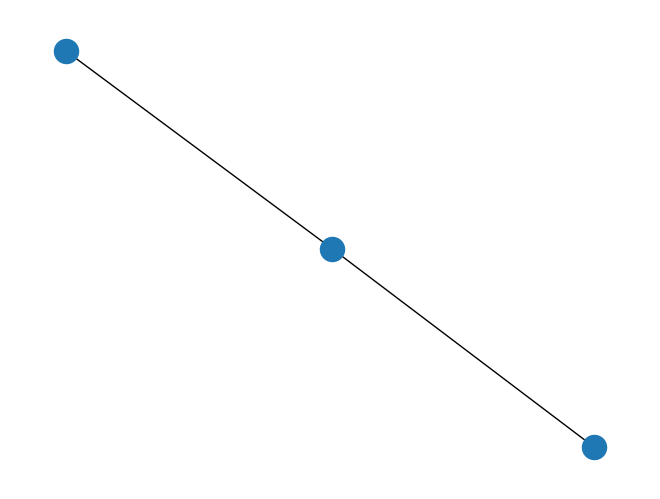

In [3]:
#Barabasi Albert model generator
bagen = rgg.BAGenerator(sizes)
G = bagen.generate()
nx.draw(G)

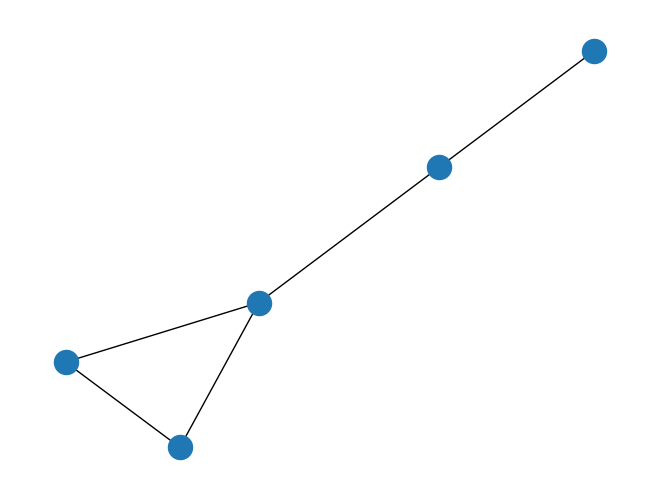

In [4]:
wsgen = rgg.WSGenerator(sizes)
G = wsgen.generate()
nx.draw(G)

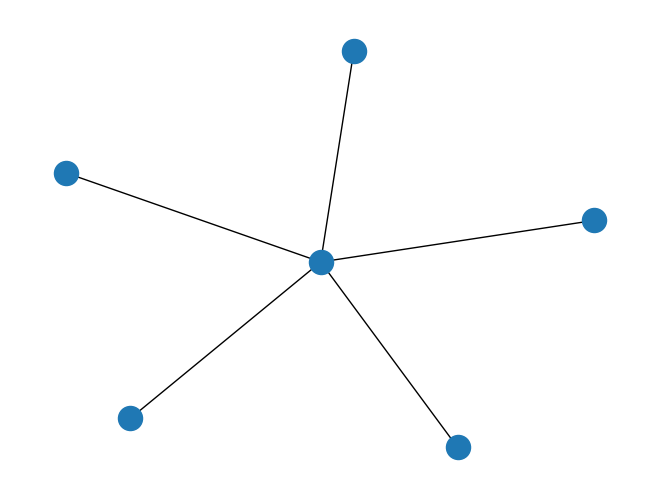

In [5]:
plcgen = rgg.PLCGenerator(sizes) #max_triangle_prob: float = 0.5
G = plcgen.generate()
nx.draw(G)

In [6]:
gen_list = [ergen,wsgen,bagen,plcgen]
rdgen = rgg.RandomGenerator(sizes)

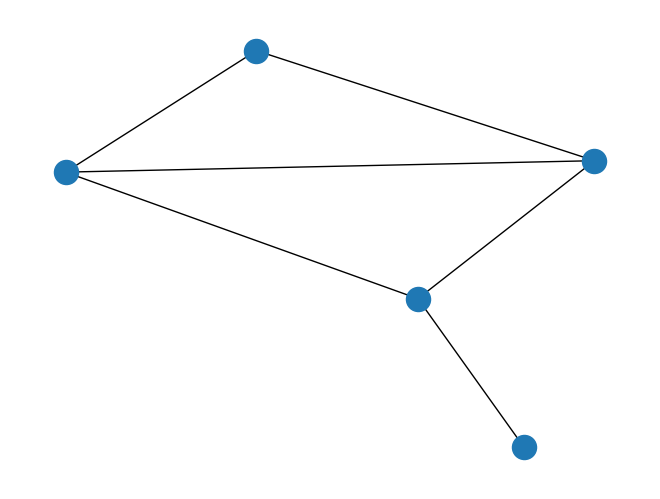

In [7]:
nx.draw(rdgen.generate())

## DataLoaders for On-The-Fly Data

### OTFContainer

In [ ]:
from data.loaders import OTFContainer
import data.random_graph_generator as rgg
sizes = range(3,11)
epoch_size = 2
batch_size = 64
generator = rgg.RandomGenerator(sizes)
dataset_length = (batch_size//2) * epoch_size
OTF_ds = OTFContainer(generator,dataset_length)

In [ ]:
for g in OTF_ds :
    print(g)
    break

In [ ]:
len(OTF_ds)

In [ ]:
OTF_ds[2]

In [ ]:
from torch_geometric.loader import DataLoader
single_loader_batch_size = batch_size//2
otf_dl = DataLoader(OTF_ds, batch_size=single_loader_batch_size)

In [ ]:
len(otf_dl)

In [ ]:
for k in otf_dl :
    print(k)

In [ ]:
otf_dl = DataLoader(OTF_ds, batch_size=single_loader_batch_size)
for a,b in zip(otf_dl,[1,2]) : 
    print(a)
    print(b)

### Dataloader

In [2]:
from data.loaders import gen_data_loaders
from data.random_graph_generator import random_generator
gen = random_generator(list(range(3,10)))
loaders = gen_data_loaders(10,64,generator=gen)

for i in loaders:
    print(i)


[None, None, None, None, None, None, None, None, None, None]


In [3]:
n = 1
for batch_target, batch_neg_target, batch_neg_query in zip(*loaders):
    print(f"cycle : {n}")
    n+=1
    print(f"Printing loader length : {len(loaders[0])}")
    
    print("batch_target : ")
    print(batch_target)
    
    print("batch_neg_target : ")
    print(batch_neg_target)

    
    print("batch_neg_query : ")
    print(batch_neg_query)

print("end")

cycle : 1
Printing loader length : 10
batch_target : 
DataBatch(edge_index=[2, 602], num_nodes=203, batch=[203], ptr=[33])
batch_neg_target : 
DataBatch(edge_index=[2, 478], num_nodes=180, batch=[180], ptr=[33])
batch_neg_query : 
None
cycle : 2
Printing loader length : 10
batch_target : 
DataBatch(edge_index=[2, 582], num_nodes=199, batch=[199], ptr=[33])
batch_neg_target : 
DataBatch(edge_index=[2, 518], num_nodes=186, batch=[186], ptr=[33])
batch_neg_query : 
None
cycle : 3
Printing loader length : 10
batch_target : 
DataBatch(edge_index=[2, 482], num_nodes=173, batch=[173], ptr=[33])
batch_neg_target : 
DataBatch(edge_index=[2, 424], num_nodes=172, batch=[172], ptr=[33])
batch_neg_query : 
None
cycle : 4
Printing loader length : 10
batch_target : 
DataBatch(edge_index=[2, 550], num_nodes=203, batch=[203], ptr=[33])
batch_neg_target : 
DataBatch(edge_index=[2, 602], num_nodes=195, batch=[195], ptr=[33])
batch_neg_query : 
None
cycle : 5
Printing loader length : 10
batch_target : 
Da

In [4]:
import networkx as nx
print(f"batch_target : {batch_target}\nlength : {len(batch_target)}\ntype : {type(batch_target)}") 
print(f"number of graphs : {batch_target.num_graphs}\nAs a list : \n{list(batch_target)}\nlist length : {len(list(batch_target))}")

batch_target : DataBatch(edge_index=[2, 630], num_nodes=197, batch=[197], ptr=[33])
length : 32
type : <class 'torch_geometric.data.batch.DataBatch'>
number of graphs : 32
As a list : 
[('edge_index', tensor([[  0,   0,   0,  ..., 196, 196, 196],
        [  1,   4,   2,  ..., 192, 193, 195]])), ('num_nodes', 197), ('batch', tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
         2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,  7,
         8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
        10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12,
        13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15,
        15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18,
        18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21,
        21, 21, 22, 22, 22, 22, 23

In [6]:
print(batch_target.get_example(0))

Data(edge_index=[2, 48], num_nodes=8)


## Batch handling

### Sample Subgraph on Batch

The first things to do when preparing batch is to sample the subgraph from our generated data. 

In [1]:
import data.random_graph_generator as rgg
from utils.torch_ml import to_pyg_data
gen = rgg.random_generator(list(range(5,15)))
g = to_pyg_data(gen.generate())
print(g)

Data(edge_index=[2, 42], num_nodes=11)


In [2]:
import random
min_size = 5
d = 1
k = random.randint(min_size - d,g.num_nodes-1)
print(k)

10


In [3]:
from torch_geometric.utils import k_hop_subgraph
from torch_geometric.data import Data
start_node = random.choice(list(range(g.num_nodes)))#Choose the starting point of the walk
neighood =k_hop_subgraph(start_node,k,g.edge_index)
print(f"starting node : {start_node},\nk-neighborhood : {neighood}")
pyg_graph = Data(edge_index=neighood[1])
pyg_graph.num_nodes = len(neighood[0])

starting node : 2,
k-neighborhood : (tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), tensor([[ 0,  0,  0,  0,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  4,  4,  5,
          5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  9,  9,
          9, 10, 10, 10, 10, 10],
        [ 2,  4,  5, 10,  6,  7,  0,  6,  9,  4,  6,  7,  0,  3,  7,  9, 10,  0,
          7, 10,  1,  2,  3,  8, 10,  1,  3,  4,  5,  8,  6,  7,  9, 10,  2,  4,
          8,  0,  4,  5,  6,  8]]), tensor([2]), tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True]))


Nb : With this method, the full graph is sample almost everytime (as predicted).

#### k_node_walk 

In [6]:
import networkx as nx
from data.batchs import k_nodes_walk
from torch_geometric.utils.convert import to_networkx
length = k

In [7]:
query_node = []
frontier = [start_node]
nx_graph = to_networkx(g,to_undirected=True)
for _ in range(length):                 #Random walk of `length` hops
    new_node = random.choice(frontier)                                  #Choosing a node among the neighbors of the graph
    query_node.append(new_node)                                         #Adding the new node to the walk
    frontier += list(nx_graph.neighbors(new_node))                      #Modifying the frontier of the new graph
    frontier = [node for node in frontier if node not in query_node]    #Deleting already encountered nodes

assert len(query_node) == len(set(query_node))
subgraph = nx_graph.subgraph(query_node)

In [8]:
subgraph.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 8, 9, 10))

In [9]:
nx_query = k_nodes_walk(g,start_node,length)

In [10]:
nx_query.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 10))

In [11]:
from utils.graph import relabel_graph_by_int
nx_query, perm = relabel_graph_by_int(nx_query)

In [12]:
nx_query.edges

EdgeView([(0, 2), (0, 4), (0, 5), (0, 9), (1, 6), (1, 7), (2, 6), (3, 4), (3, 6), (3, 7), (4, 7), (4, 9), (5, 7), (5, 9), (6, 8), (6, 9), (7, 8), (8, 9)])

In [13]:
perm

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 10: 9}

In [14]:
from utils.torch_ml import to_pyg_data
from data.batchs import gen_anchor_feature
query = to_pyg_data(nx_query)
query.x = gen_anchor_feature(query,perm[start_node])


In [15]:
query.edge_index

tensor([[0, 0, 0, 0, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 6, 7,
         7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9],
        [2, 4, 5, 9, 6, 7, 0, 6, 4, 6, 7, 0, 3, 7, 9, 0, 7, 9, 1, 2, 3, 8, 9, 1,
         3, 4, 5, 8, 6, 7, 9, 0, 4, 5, 6, 8]])

In [16]:
query.x

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

#### Hards Negs Modification

They only randomly add between 0 and 5 edges to the initial graph to disturb it

Data(edge_index=[2, 42], num_nodes=11)
Graph with 11 nodes and 21 edges


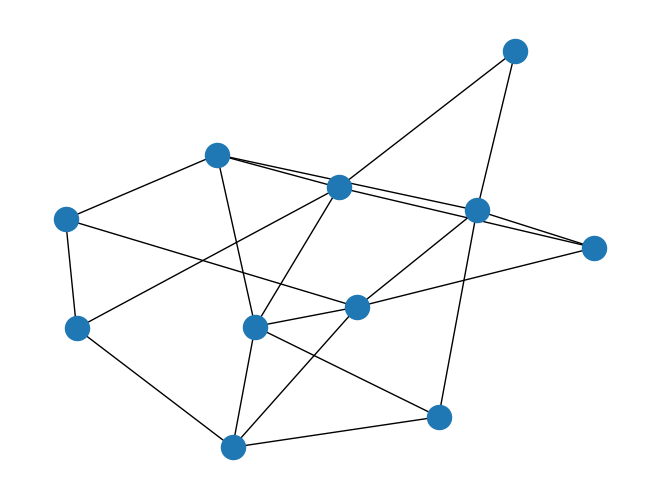

In [17]:
import networkx as nx
from torch_geometric.utils.convert import to_networkx
print(pyg_graph)
nx_ng = to_networkx(pyg_graph,to_undirected=True)
print(nx_ng)
nx.draw(nx_ng)
non_edges = list(nx.non_edges(nx_ng))

In [18]:
for u, v in random.sample(non_edges, random.randint(1, min(len(non_edges),5) )): #Adding up to a maximum of 5 edges more
    print(u,v)
    nx_ng.add_edge(u,v)


6 7
7 10


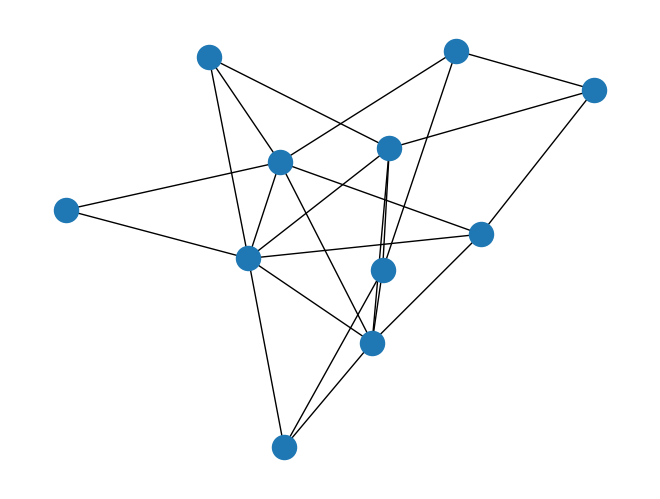

In [19]:
nx.draw(nx_ng)

#### Tagging the anchor

In [20]:
import random
done = False
k = 0
while not done:
    k+= 1
    if not (random.random() < 1.0) :
        done = True

print(k)

KeyboardInterrupt: 

In [21]:
print(k)

18187240


The initial code tag the encode with a node feature so it can be found.

In [16]:
import torch
anchor_feature =[]

import data.random_graph_generator as rgg
import random
from utils.torch_ml import to_pyg_data
from torch_geometric.utils import k_hop_subgraph
from torch_geometric.data import Data
gen = rgg.random_generator(list(range(5,15)))
g = to_pyg_data(gen.generate())
start_node = random.choice(list(range(g.num_nodes)))#Choose the starting point of the walk


for k in range(g.num_nodes):
    if k == start_node :
        anchor_feature.append(torch.ones(1))
    else :
        anchor_feature.append(torch.zeros(1))

g.x = torch.tensor(anchor_feature)

neighood =k_hop_subgraph(start_node,k,g.edge_index)

print(anchor_feature)

[tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.])]


In [17]:
neighood

(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 tensor([[ 0,  1,  2,  2,  2,  3,  3,  4,  4,  5,  5,  6,  7,  7,  8,  8,  9,  9,
           9,  9, 10, 10],
         [ 4,  2,  1,  3,  9,  2,  9,  5,  0,  4, 10,  7,  6,  8,  7,  9,  8,  3,
           2, 10,  5,  9]]),
 tensor([7]),
 tensor([True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True]))

In [143]:
ng_graph = Data(x=torch.Tensor(anchor_feature),edge_index=neighood[1])       

In [144]:
ng_graph.x

tensor([0., 0., 1., 0., 0., 0., 0., 0.])

In [150]:
new_feat = torch.tensor(ng_graph.x,torch.ones(8))
new_feat

TypeError: tensor() takes 1 positional argument but 2 were given

In [128]:
ng_graph.num_node_features

1

#### Testing full version

In [22]:
from data.batchs import sample_subgraph
import data.random_graph_generator as rgg
from utils.torch_ml import to_pyg_data

gen = rgg.random_generator(list(range(5,15)))
g = to_pyg_data(gen.generate())
print(g)

Data(edge_index=[2, 28], num_nodes=7)


In [23]:
sample_subgraph(g,True)

(Data(edge_index=[2, 28], num_nodes=7, x=[7, 1]),
 Data(edge_index=[2, 14], num_nodes=5, x=[5, 1]))

In [24]:
target, query = sample_subgraph(g,True)
print(target.x)
print(query.x)

tensor([[0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])
tensor([[1.],
        [0.],
        [0.],
        [0.]])


In [25]:
print(query.x.dtype)
print(query.x.size())

torch.float32
torch.Size([4, 1])


**NB** : I'll maybe have to pu a tens.unsqueeze(0) in sample_subgraph so I have a feature vector of a good dimension.

In [26]:
sample_subgraph(g,True,True)

(Data(edge_index=[2, 28], num_nodes=7, x=[7, 1]),
 Data(edge_index=[2, 12], num_nodes=4, x=[4, 1]))

In [27]:
target, query = sample_subgraph(g,True,True)
print(target.x)
print(query.x)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.]])
tensor([[0.],
        [1.],
        [0.],
        [0.]])


### Batch Augmentation 

In [28]:
from data.loaders import gen_data_loaders
import data.random_graph_generator as rgg

epoch_size = 10
gen = rgg.random_generator(list(range(5,15)))
loaders = gen_data_loaders(epoch_size,batch_size= 64,generator=gen)

for batch_target, batch_neg_target, batch_neg_query in zip(*loaders): #Unzipping for test 
    break

for g in batch_target.to_data_list():
    print(g)

Data(edge_index=[2, 52], num_nodes=10)
Data(edge_index=[2, 10], num_nodes=6)
Data(edge_index=[2, 44], num_nodes=11)
Data(edge_index=[2, 8], num_nodes=5)
Data(edge_index=[2, 52], num_nodes=10)
Data(edge_index=[2, 98], num_nodes=14)
Data(edge_index=[2, 24], num_nodes=12)
Data(edge_index=[2, 16], num_nodes=6)
Data(edge_index=[2, 72], num_nodes=11)
Data(edge_index=[2, 24], num_nodes=6)
Data(edge_index=[2, 12], num_nodes=6)
Data(edge_index=[2, 20], num_nodes=10)
Data(edge_index=[2, 80], num_nodes=12)
Data(edge_index=[2, 12], num_nodes=7)
Data(edge_index=[2, 20], num_nodes=6)
Data(edge_index=[2, 28], num_nodes=7)
Data(edge_index=[2, 48], num_nodes=14)
Data(edge_index=[2, 20], num_nodes=10)
Data(edge_index=[2, 80], num_nodes=12)
Data(edge_index=[2, 54], num_nodes=9)
Data(edge_index=[2, 60], num_nodes=13)
Data(edge_index=[2, 70], num_nodes=12)
Data(edge_index=[2, 60], num_nodes=13)
Data(edge_index=[2, 34], num_nodes=7)
Data(edge_index=[2, 110], num_nodes=13)
Data(edge_index=[2, 10], num_nodes=

In [29]:
from data.batchs import sample_subgraph
target, query = [], []
for g in batch_target.to_data_list():
    g_target, g_query = sample_subgraph(g,True)
    target.append(g_target)
    query.append(g_query)

print(len(query))

32


In [30]:
import random
hard_neg_idxs = set(random.sample(range(batch_neg_target.batch_size), int(batch_neg_target.batch_size * 1/2)))
hard_neg_idxs

{0, 1, 2, 4, 7, 9, 12, 13, 15, 17, 20, 21, 22, 25, 28, 31}

In [31]:
import torch_geometric.data as pyg_data
from utils.torch_ml import to_pyg_data
batch_neg_query = pyg_data.Batch.from_data_list( #The question is why do they generate it here better than in the Dataloader
            [to_pyg_data(gen.generate(size=len(g))) if i not in hard_neg_idxs else g for i, g in enumerate(batch_neg_target.to_data_list())])

In [32]:
batch_neg_query

DataBatch(edge_index=[2, 608], num_nodes=190, batch=[190], ptr=[33])

In [33]:
for i, g in enumerate(batch_neg_query.to_data_list()):
    g["idx"] = i 

In [34]:
print(g.idx)
print(g)
print(batch_neg_query.get_example(31))

31
Data(edge_index=[2, 94], num_nodes=14, idx=31)
Data(edge_index=[2, 94], num_nodes=14)


In [35]:
batch_neg_query["idx"] = list(range(32))

In [36]:
print(batch_neg_query)
print(batch_neg_query.get_example(31))

DataBatch(edge_index=[2, 608], num_nodes=190, batch=[190], ptr=[33], idx=[32])
Data(edge_index=[2, 94], num_nodes=14)


In [37]:
del batch_neg_query["idx"]

In [38]:
target = list()
for i, g in enumerate(batch_neg_query.to_data_list()):
    g["idx"] = i 
    target.append(g)

In [39]:
print(batch_neg_query)
print(batch_neg_query.get_example(31))
new_batch = pyg_data.Batch.from_data_list(target)
print(new_batch)

DataBatch(edge_index=[2, 608], num_nodes=190, batch=[190], ptr=[33])
Data(edge_index=[2, 94], num_nodes=14)
DataBatch(edge_index=[2, 608], num_nodes=190, idx=[32], batch=[190], ptr=[33])


In [2]:
from torch_geometric.data import Batch
Batch.from_data_list()

DataBatch(edge_index=[2, 1382], num_nodes=318, batch=[318], ptr=[33])

### Generating full batch 

In [40]:
import random
import numpy as np
import networkx as nx

from torch_geometric.data import Batch
from data.random_graph_generator import random_generator
from data.loaders import gen_data_loaders
from utils.torch_ml import to_pyg_data

epoch_size = 10
gen = random_generator(np.arange(5 + 1, 29 + 1))
loaders = gen_data_loaders(epoch_size,batch_size= 64,generator=gen)

print(loaders)

for batch_target, batch_neg_target, batch_neg_query in zip(*loaders): #Unzipping for test 
    break


neg_target = batch_neg_target

hard_neg_idxs = set(random.sample(range(neg_target.num_graphs),
            int(neg_target.num_graphs/2)))                          #That can be modify, int(...) is kept here to approach the original code approximation (even if num_graph//2 would be better)

batch_neg_query = Batch.from_data_list(
            [to_pyg_data(gen.generate(size=len(g))) if i not in hard_neg_idxs else g for i, g in enumerate(neg_target.to_data_list())])

#pos_a, pos_b, neg_a, neg_b = gen_batch(batch_target,batch_neg_target, batch_neg_query, True,generator=gen)

[<torch_geometric.loader.dataloader.DataLoader object at 0x17911ec10>, <torch_geometric.loader.dataloader.DataLoader object at 0x1791a57d0>, [None, None, None, None, None, None, None, None, None, None]]


In [41]:
from data.batchs import augment_batch
pos_a, pos_b, neg_a, neg_b = augment_batch(batch_target,batch_neg_target, gen)


In [42]:
pos_a

DataBatch(edge_index=[2, 4308], num_nodes=546, x=[546, 1], batch=[546], ptr=[33])

In [43]:
pos_b

DataBatch(edge_index=[2, 1708], num_nodes=305, x=[305, 1], batch=[305], ptr=[33])

In [44]:
neg_a

DataBatch(edge_index=[2, 3658], num_nodes=541, x=[541, 1], batch=[541], ptr=[33])

In [45]:
neg_b

DataBatch(edge_index=[2, 1334], num_nodes=226, x=[226, 1], batch=[226], ptr=[33])

In [46]:
weird = []
for k in neg_b.to_data_list():
    if len(k.x) != k.num_nodes:
        weird.append(k)
        print(k)
    
    

In [47]:
weird[0]

IndexError: list index out of range

In [48]:
len(k.x)

9

**NB** : With this methodology, we can already see here that there is actually a huge bias. All positives are the same size (target_len = query_len) whereas negative are different (at least for most easy_neg)

## Testing the model

### Generating a dummy embedding

In [3]:
from models.NM import NeuroMatchNetwork
model = NeuroMatchNetwork()

In [4]:
#Generating a random graph
import data.random_graph_generator as rgg 
from utils.torch_ml import to_pyg_data
gen = rgg.RandomGenerator(list(range(5,15)))
graph = to_pyg_data(gen.generate())
graph


Data(edge_index=[2, 44], num_nodes=10)

In [5]:
import torch
graph_list = []
for k in range(2*64):
    graph = to_pyg_data(gen.generate())
    graph.x = torch.tensor([1.]*graph.num_nodes).unsqueeze(-1) #Adding a fake feature data (float type is important)
    graph_list.append(graph)
    
#graph_list

In [6]:
graph #the unsqueeze of graph.x is used to have the good size/dim. 

Data(edge_index=[2, 46], num_nodes=10, x=[10, 1])

In [7]:
from torch_geometric.loader import DataLoader
dl = DataLoader(graph_list,batch_size=32)
dl

In [8]:
batch_data = next(iter(dl))
batch_data

DataBatch(edge_index=[2, 1328], num_nodes=309, x=[309, 1], batch=[309], ptr=[33])

In [9]:
batch_data.x.dim()

2

In [10]:
emb = model.forward(batch_data)

In [11]:
print(emb.size())

torch.Size([32, 64])


In [12]:
emb 

tensor([[ 0.1216, -0.0218,  0.1618,  ...,  0.2164, -0.1000, -0.1027],
        [ 0.0925,  0.0115,  0.1373,  ...,  0.1589, -0.0670, -0.0832],
        [ 0.1022,  0.0246,  0.1320,  ...,  0.1220, -0.0614, -0.0498],
        ...,
        [ 0.1287, -0.0290,  0.1698,  ...,  0.2346, -0.1120, -0.1119],
        [ 0.1164,  0.0351,  0.1167,  ...,  0.0944, -0.0576, -0.0232],
        [ 4.6534, -3.2391,  1.5892,  ...,  6.1962, -3.6608, -2.7642]],
       grad_fn=<AddmmBackward0>)

In [13]:
type(emb)

torch.Tensor

### Testing the loss function

Let's just do a dummy test set so we can compute a loss function and test it. 

In [14]:
pos_target = emb
temp = []
for batch in dl : 
    temp.append(model.forward(batch))


In [15]:
pos_query = temp[0]
neg_target = temp[1]
neg_query = temp[2]
neg_query

tensor([[ 5.5149e+00, -3.8221e+00,  1.8246e+00,  ...,  7.4193e+00,
         -4.4443e+00, -3.2129e+00],
        [ 1.6692e-01, -8.2939e-02,  2.7999e-01,  ...,  3.7664e-01,
         -1.2548e-01, -2.9363e-01],
        [ 3.7538e-01, -3.8948e-01,  4.3302e-01,  ...,  8.1668e-01,
         -2.9101e-01, -6.4272e-01],
        ...,
        [ 3.9879e+00, -2.8848e+00,  1.5233e+00,  ...,  5.1343e+00,
         -2.8091e+00, -2.5323e+00],
        [ 6.0428e-01, -5.4156e-01,  4.3389e-01,  ...,  9.6000e-01,
         -3.6141e-01, -6.6769e-01],
        [ 1.2281e-01,  9.2514e-04,  1.4283e-01,  ...,  1.5632e-01,
         -7.6129e-02, -6.0961e-02]], grad_fn=<AddmmBackward0>)

In [16]:
from models.NM import nm_criterion
loss = nm_criterion(pos_target,pos_query,neg_target,neg_query)
loss


tensor(142.8858, grad_fn=<AddBackward0>)

In [85]:
type(loss)

torch.Tensor

Let's compare it with the original git function to see the difference

In [17]:
def criterion(pred, intersect_embs, labels):
        """Loss function for order emb.
        The e term is the amount of violation (if b is a subgraph of a).
        For positive examples, the e term is minimized (close to 0); 
        for negative examples, the e term is trained to be at least greater than self.margin.

        pred: lists of embeddings outputted by forward
        intersect_embs: not used
        labels: subgraph labels for each entry in pred
        """
        emb_as, emb_bs = pred
        e = torch.sum(torch.max(torch.zeros_like(emb_as), emb_bs - emb_as)**2, dim=1)

        margin = 0.1
        e[labels == 0] = torch.max(torch.tensor(0.0), margin - e)[labels == 0]

        relation_loss = torch.sum(e)

        return relation_loss

In [21]:
emb_as = torch.cat((pos_target, neg_target), dim=0)
emb_bs = torch.cat((pos_query, neg_query), dim=0)
pred = (emb_as, emb_bs)
print(emb_as.shape)
labels = torch.tensor([1]*32 + [0]*32)
labels.shape

torch.Size([64, 64])


torch.Size([64])

In [22]:
criterion(pred,None, labels)

tensor(0.3444, grad_fn=<SumBackward0>)

Problem here (: 

In [24]:
e = torch.sum(torch.max(torch.zeros_like(emb_as), emb_bs - emb_as)**2, dim=1)
e.shape

torch.Size([64])

In [25]:
e

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.0175e+02, 5.1296e-01, 4.3624e+00, 9.6394e+00,
        2.4087e+03, 2.9924e+02, 9.3237e-01, 4.3859e+00, 1.4283e+03, 3.8009e+01,
        1.1407e+01, 5.7957e+01, 5.4181e+02, 4.7712e+01, 1.0164e+03, 2.6584e+00,
        8.8703e-03, 3.4510e+00, 7.7555e+01, 8.2659e-01, 2.1672e+01, 1.2844e-02,
        2.3862e-02, 1.5164e+03, 1.4136e+03, 4.0309e+00, 6.6203e+03, 7.9428e+00,
        1.8915e+02, 2.2063e+02, 1.0027e-02, 1.3215e-01],
       grad_fn=<SumBackward1>)

In [29]:
e_pos = torch.max(torch.zeros_like(pos_target),pos_query-pos_target)**2
e_neg = torch.max(torch.zeros_like(neg_target),neg_query-neg_target)**2
e_neg.shape

torch.Size([32, 64])

In [28]:
e_neg

tensor([[2.8891e+01, 0.0000e+00, 2.5072e+00,  ..., 5.0778e+01, 0.0000e+00,
         0.0000e+00],
        [5.2951e-03, 0.0000e+00, 2.0412e-02,  ..., 4.7275e-02, 0.0000e+00,
         0.0000e+00],
        [8.0010e-02, 0.0000e+00, 8.7451e-02,  ..., 4.3266e-01, 0.0000e+00,
         0.0000e+00],
        ...,
        [1.5099e+01, 0.0000e+00, 1.9357e+00,  ..., 2.5124e+01, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 4.5245e-06,  ..., 7.7461e-06, 7.1450e-05,
         0.0000e+00],
        [0.0000e+00, 3.4409e-03, 0.0000e+00,  ..., 0.0000e+00, 3.7701e-03,
         7.5844e-03]], grad_fn=<PowBackward0>)

In [32]:
margin = 0.1
eprime = e.clone()
eprime[labels == 0] = torch.max(torch.tensor(0.0), margin - e)[labels == 0]

In [33]:
eprime

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0911, 0.0000, 0.0000, 0.0000, 0.0000, 0.0872,
        0.0761, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0900,
        0.0000], grad_fn=<IndexPutBackward0>)

In [41]:
neg_loss = torch.sum(torch.max(torch.zeros_like(e_neg),margin - e_neg))
pos_loss = torch.sum(e_pos)
pos_loss.shape

torch.Size([])

In [42]:
pos_loss

tensor(0., grad_fn=<SumBackward0>)

In [43]:
neg_loss

tensor(142.8858, grad_fn=<SumBackward0>)

### Testing the prediction function

In [86]:
emb_targets = torch.cat((pos_target, neg_target), dim=0)
emb_subgraphs = torch.cat((pos_query, neg_query), dim=0)

In [87]:
emb_targets.shape

torch.Size([64, 64])

In [88]:
e = torch.sum(torch.max(torch.zeros_like(emb_targets,
        device=emb_targets.device), emb_subgraphs - emb_targets)**2, dim=1)

In [89]:
print(e.shape)
e

torch.Size([64])


tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.9310e-01, 1.7153e+00, 4.3559e-01, 4.4124e+01,
        1.4315e-01, 8.9301e-02, 7.8213e-02, 1.2076e+00, 2.3696e+02, 4.6055e+00,
        5.1952e-02, 6.5991e+00, 5.9400e+01, 2.3528e+01, 3.2609e-01, 4.8036e+00,
        9.4019e-01, 1.4085e-02, 5.0680e+01, 1.2344e+03, 8.8600e+00, 8.5274e+00,
        2.7601e+02, 3.1704e-02, 1.0210e+02, 1.4384e+04, 1.8363e+02, 1.2253e+01,
        1.3214e+02, 5.5185e+00, 3.3889e-01, 9.2649e-02],
       grad_fn=<SumBackward1>)

**NB** : We can see here that positive examples have a differences of 0. It's probably due to the fact that the query graph is exactly the same than the target graph. Hence, they have exactly the same embedding. 

In [90]:
e < 0.1

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False, False, False, False, False,  True,  True, False,
        False, False,  True, False, False, False, False, False, False,  True,
        False, False, False, False, False,  True, False, False, False, False,
        False, False, False,  True])

In [91]:
#We should have the same result with nm_predict 
from models.NM import treshold_predict
treshold_predict(emb_targets,emb_subgraphs)

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False, False, False, False, False,  True,  True, False,
        False, False,  True, False, False, False, False, False, False,  True,
        False, False, False, False, False,  True, False, False, False, False,
        False, False, False,  True])

## Training and Multiprocessing

In [92]:
from data.loaders import gen_data_loaders
from data.random_graph_generator import random_generator
from models.NM import NeuroMatchNetwork
from data.batchs import augment_batch
import numpy as np
from models.NM import nm_criterion, treshold_predict
import torch 
import torch.nn as nn
from utils.torch_ml import get_device
generator = random_generator(np.arange(5 + 1, 29 + 1))
loaders = gen_data_loaders(generator=generator)


model = NeuroMatchNetwork()

lr=1e-4
weight_decay = 0.0

In [93]:
pos_batch, neg_batch, _ = next(zip(*loaders))
model.train()
model.zero_grad()
pos_target, pos_query, neg_target, neg_query = augment_batch(pos_batch,neg_batch,generator)


In [94]:
pos_target

DataBatch(edge_index=[2, 3350], num_nodes=571, x=[571, 1], batch=[571], ptr=[33])

In [95]:
pos_target.num_graphs

32

In [96]:
emb_pos_tar = model(pos_target)
emb_pos_que = model(pos_query)
emb_neg_tar = model(neg_target)
emb_neg_que = model(neg_query)

In [97]:

loss = nm_criterion(emb_pos_tar,emb_pos_que,emb_neg_tar,emb_neg_que)
loss.backward()

In [98]:
loss

tensor(4657067., grad_fn=<AddBackward0>)

In [99]:
emb_pos_tar

tensor([[ 6.0525e-01,  4.5801e-01, -1.1010e-03,  ...,  2.3508e-03,
          4.1252e-01, -7.1433e-02],
        [ 1.0825e+01,  3.4343e+00, -1.6268e-01,  ..., -4.4901e+00,
          7.0250e+00, -3.4623e-01],
        [ 8.1525e-01,  6.0253e-01,  6.1326e-03,  ...,  1.0947e-02,
          5.5574e-01, -6.8789e-02],
        ...,
        [ 2.5052e+00,  1.1116e+00, -2.3413e-01,  ..., -4.5877e-01,
          9.2377e-01, -8.1270e-01],
        [ 9.0393e-01,  5.6681e-01, -4.3575e-02,  ..., -9.8852e-02,
          4.7316e-01, -2.3557e-01],
        [ 1.4526e-01,  1.5728e-01, -8.1778e-02,  ...,  2.3802e-02,
          9.3619e-02, -7.9283e-02]], grad_fn=<AddmmBackward0>)

In [100]:
emb_pos_tar.size()

torch.Size([32, 64])

In [101]:
emb_target = torch.cat((emb_pos_tar, emb_neg_tar), dim=0)
emb_query = torch.cat((emb_pos_que, emb_neg_que), dim=0)
pred_treshold = treshold_predict(emb_target,emb_query) #Let's not use the treshold model 
pred_treshold

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False,  True,  True, False, False,  True, False, False, False,
         True, False, False, False,  True, False,  True,  True, False, False,
        False,  True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,  True,
        False,  True, False, False, False, False,  True, False, False, False,
        False, False,  True, False])

In [102]:
emb_target.size()

torch.Size([64, 64])

### Using a Linear Model in place of the treshold

In [103]:
pred = torch.sum(torch.max(torch.zeros_like(emb_target,
            device=emb_target.device), emb_query - emb_target)**2, dim=1)
pred

tensor([1.0946e-01, 8.0875e+02, 1.4720e-01, 4.4623e+03, 2.8270e+04, 1.9821e-01,
        1.9740e-01, 5.1084e+04, 2.0440e-01, 1.2294e+01, 1.8494e+02, 4.9062e+03,
        3.3517e-02, 8.2800e-03, 8.4830e-01, 1.9036e+06, 7.8951e-02, 4.5162e-01,
        1.1502e+04, 3.3274e+00, 6.9852e-02, 4.8889e+00, 1.1718e+00, 2.6521e+06,
        4.6332e-02, 3.5528e-01, 7.8830e-03, 6.8414e-02, 2.0581e+00, 2.7206e+01,
        1.1820e+00, 5.9667e-03, 1.7905e+02, 9.8733e-01, 4.0849e+01, 1.8426e-01,
        1.1420e-01, 8.2539e-01, 3.9924e+02, 1.4299e+01, 4.6331e+00, 1.5942e+00,
        1.1777e-01, 3.2228e+01, 2.2162e+03, 1.0056e+03, 9.7547e+03, 2.3606e+03,
        1.9988e-01, 1.6526e-02, 2.2415e+05, 1.9586e-02, 9.7138e-01, 1.8814e+05,
        4.5689e+04, 3.3528e+03, 4.2597e-02, 3.4672e+02, 3.0462e-01, 1.1874e+01,
        1.2480e+02, 1.6576e+02, 1.6098e-02, 2.8194e+02],
       grad_fn=<SumBackward1>)

In [104]:
pred.shape

torch.Size([64])

In [105]:
pred.unsqueeze(1).shape

torch.Size([64, 1])

In [106]:
labels = torch.tensor([1.]*32 + [0.]*32).to(get_device()).unsqueeze(1)
pred = pred.unsqueeze(1)
print(labels)
print(pred)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])
tensor([[1.0946e-01],
        [8.0875e+02],
        [1.4720e-01],
        [4.4623e+03],
        [2.8270

In [107]:
clf_model = nn.Sequential(nn.Linear(1, 1), nn.LogSoftmax())
pred = clf_model(pred)
print(pred)
criterion = nn.BCELoss()
clf_loss = criterion(pred, labels) 
clf_loss

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<LogSoftmaxBackward0>)


/opt/anaconda3/envs/testNeuro/lib/python3.11/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor(50., grad_fn=<BinaryCrossEntropyBackward0>)

In [108]:
labels.size()

torch.Size([64, 1])

In [109]:
pred.size()

torch.Size([64, 1])

In [110]:
pred = pred.argmax(dim = -1)

In [111]:
pred

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [112]:
acc = torch.mean((pred == labels).type(torch.float))

In [113]:
acc

tensor(0.5000)

In [114]:
print(float(True))
print(float(False))

1.0
0.0


### NeuroMatchPred Class Test 

In [115]:
from models.NM import NeuroMatchPred
from utils.torch_ml import get_device
import torch
predict = NeuroMatchPred()
emb_targets = torch.rand(64,64).to(get_device())
emb_querys = torch.rand(64,64).to(get_device())

Pretrain Prediction Model


In [116]:
predict.predict(emb_targets,emb_querys)

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False])

In [117]:
labels = torch.tensor([1]*32 + [0]*32).to(get_device())
predict.model.train()
for k in range(30000) : 
    pos = torch.rand(32,64).to(get_device()) #This method of generation of embedding is also use for the pre_training
    neg_tar = torch.rand(32,64).to(get_device())
    neg_que = torch.rand(32,64).to(get_device())
    shuf = torch.randperm(64)
    emb_targets = torch.cat((pos, neg_tar), dim=0)[shuf]
    emb_querys = torch.cat((pos, neg_que), dim=0)[shuf]
    pred , loss = predict.train(emb_targets,emb_querys,labels[shuf])
    pred = pred.argmax(dim=-1)
    acc = torch.mean((pred == labels[shuf]).type(torch.float)).item()
    print(f"loss : {loss}, k : {k}, acc : {acc}", end="                          \r")

In [118]:
pred

tensor([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1])

In [119]:
labels[shuf]

tensor([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1])

In [120]:
predict.predict(emb_targets,emb_querys)

tensor([False,  True, False,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True, False, False,  True, False, False, False, False,
         True, False,  True,  True,  True,  True, False, False,  True, False,
        False,  True, False,  True, False, False, False, False,  True, False,
         True, False, False,  True,  True,  True, False, False,  True,  True,
        False, False, False,  True, False,  True,  True, False,  True, False,
         True, False, False,  True])

### Testing the train() and train_loop() functions

In [1]:
from train import train
import torch.multiprocessing as mp
import numpy as np 
from models.NM import NeuroMatchNetwork, NeuroMatchPred
import data.random_graph_generator as rgg
mp.set_start_method("spawn",force=True)
emb_model = NeuroMatchNetwork()
pred_model = NeuroMatchPred()
emb_model.share_memory()
pred_model.model.share_memory()
generator = rgg.random_generator(np.arange(6,30))

Pretrain Prediction Model


In [2]:
in_queue, out_queue = mp.Queue(), mp.Queue()
workers = []
worker = mp.Process(target=train, args=(emb_model,pred_model,generator,in_queue,out_queue))
worker.start()
print(f"Worker {0} PID : {worker.pid}")
workers.append(worker)

Worker 0 PID : 79409


In [54]:
in_queue.put((1e-4,"step"))
_, (loss, acc, _) = out_queue.get()
print(f"loss : {loss:.4f}, acc : {acc:.4f}", end="           \r")
in_queue.put("done")
del loss, acc

KeyboardInterrupt: 

In [1]:
from train import train_loop
train_loop()

Pretrain Prediction Model
Generating testing batch : 64 / 64      
Worker 0 PID : 83361
Worker 1 PID : 83362
Worker 2 PID : 83363
Worker 3 PID : 83364
Worker 4 PID : 83365
Worker 5 PID : 83366
Training Evaluation : Epoch 0                                                                       
Embedding Metrics  : Max : 843059.25, Mean : 261.1016540527344, Standard Deviation : 13534.5009765625, MSE : 19365730.0
Prediction Metrics : Accuracy : 0.60498046875, Precision : 0.646457765667575, Recall : 0.46337890625
--------------------------------------------------
Training Evaluation : Epoch 1                                                                       
Embedding Metrics  : Max : 22505.0390625, Mean : 7.270569801330566, Standard Deviation : 352.2828063964844, MSE : 928.7848510742188
Prediction Metrics : Accuracy : 0.69921875, Precision : 0.6674876847290641, Recall : 0.7939453125
--------------------------------------------------
Training Evaluation : Epoch 2                       

KeyboardInterrupt: 

## Evaluation of the model 

In [128]:
from evalutation import generating_evaluation_batchs
batchs_list = generating_evaluation_batchs()
print(batchs_list[0])
len(batchs_list[0][0])

Generating testing batch : 00064 / 00064      
(DataBatch(edge_index=[2, 4536], num_nodes=612, x=[612, 1], batch=[612], ptr=[33]), DataBatch(edge_index=[2, 2096], num_nodes=369, x=[369, 1], batch=[369], ptr=[33]), DataBatch(edge_index=[2, 2930], num_nodes=575, x=[575, 1], batch=[575], ptr=[33]), DataBatch(edge_index=[2, 944], num_nodes=207, x=[207, 1], batch=[207], ptr=[33]))


32

In [129]:
len(batchs_list[0])

4

In [130]:
from models.NM import NeuroMatchNetwork, NeuroMatchPred
len(batchs_list)
emb_model = NeuroMatchNetwork()
pred_model = NeuroMatchPred()

Pretrain Prediction Model


In [131]:
#list
from evalutation import evaluation_predict
pred, labels, e_score = evaluation_predict(emb_model,pred_model,batchs_list)
print(len(pred))

4096                                                                                                 


In [132]:
#torch tensor
from evalutation import evaluation_predict
pred, labels, e_score = evaluation_predict(emb_model,pred_model,batchs_list)
print(len(pred))

4096                                                                                                 


In [133]:
64*300

19200

In [134]:
pred[:10] == labels[:10]

tensor([False, False, False, False, False, False, False, False,  True, False])

In [135]:
print(pred[:10])
print(labels[:10])

tensor([False, False, False, False, False, False, False, False,  True, False])
tensor([True, True, True, True, True, True, True, True, True, True])


In [136]:
labels[-64:]

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False])

In [137]:
import torch
acc = torch.mean((pred == labels).type(torch.float)).item()
prec = (torch.sum(pred * labels).item() / torch.sum(pred).item() if
        torch.sum(pred) > 0 else float("NaN"))                              #Precision over the full batch 
recall = (torch.sum(pred * labels).item() /
        torch.sum(labels).item() if torch.sum(labels) > 0 else
        float("NaN"))                                                       #Recall over the full batch 

In [138]:
print(acc)
print(prec)
print(recall)

0.520751953125
0.5441329179646937
0.255859375


In [139]:
e_score

tensor([2.4943e+04, 5.7121e+06, 2.1451e+00,  ..., 5.5184e+01, 3.2111e+04,
        8.7988e+04])

In [140]:
e_score.shape

torch.Size([4096])

In [141]:
labels.shape

torch.Size([4096])

In [142]:
pred.shape

torch.Size([4096])

In [143]:
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix

auroc = roc_auc_score(labels, pred)                                 #sklearn.metrics.roc_auc_score 
avg_prec = average_precision_score(labels, pred)                    #sklearn.metrics.average_precision_score
tn, fp, fn, tp = confusion_matrix(labels, pred).ravel()                 #sklearn.metrics.confusion_matrix TrueNeg, FalsePos, FalseNeg, TruePos

In [144]:
print(auroc)
print(avg_prec)
print(f"TN : {tn} FN : {fn} TP : {tp} TN : {tn}")

0.520751953125
0.5112918208073728
TN : 1609 FN : 1524 TP : 524 TN : 1609


In [145]:
max_loss = torch.max(e_score)
mean_loss = torch.mean(e_score)

In [146]:
max_loss

tensor(3.4804e+08)

In [147]:
mean_loss

tensor(770101.1875)

In [148]:
torch.median(e_score)

tensor(22.8633)

In [149]:
torch.std(e_score)

tensor(9419560.)

In [150]:
e_score

tensor([2.4943e+04, 5.7121e+06, 2.1451e+00,  ..., 5.5184e+01, 3.2111e+04,
        8.7988e+04])

In [151]:
e_score[labels]

tensor([2.4943e+04, 5.7121e+06, 2.1451e+00,  ..., 3.7618e+01, 1.4946e-02,
        2.1678e+03])

In [152]:
torch.zeros_like(e_score[labels]).shape

torch.Size([2048])

In [153]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(e_score[labels],torch.zeros_like(e_score[labels]))


100841570000000.0

In [154]:
e_score.dtype

torch.float32

## Precision recall curves as in neuromatch git

In [2]:
import torch
from models.NM import NeuroMatchNetwork, NeuroMatchPred
emb_model = NeuroMatchNetwork()
pred_model = NeuroMatchPred(pretrain=False)

emb_model.load_state_dict(torch.load("ckpt/emb_model_4.pt"))
pred_model.model.load_state_dict(torch.load("ckpt/pred_model_linear_4.pt"))

<All keys matched successfully>

In [3]:
pred_model.model

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): LogSoftmax(dim=-1)
)

Generating testing batch : 64 / 64      
Prediction Metrics : Accuracy : 0.851318359375, Precision : 0.7740952380952381, Recall : 0.9921875   
Saved PR curve plot in plots/precision-recall-curve.png


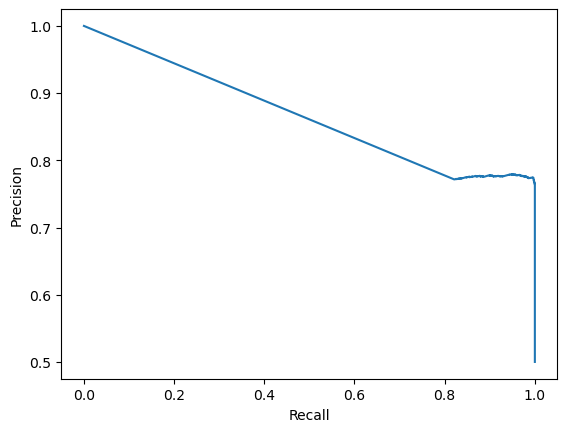

In [4]:
from evalutation import nm_pr_curve, generating_evaluation_batchs
batchs_list = generating_evaluation_batchs()
nm_pr_curve(emb_model,pred_model,batchs_list)

In [11]:
import torch.optim as optim 
from models.NM import NeuroMatchNetwork
emb_model = NeuroMatchNetwork()
filter_fn = filter(lambda p : p.requires_grad, emb_model.parameters())
opt = optim.Adam(filter_fn, lr=1e-3, weight_decay=0)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(opt)

for i in range(30): 
    print("opt : ",opt.param_groups[0]["lr"])
    scheduler.step(3)
    try :
        print("scheduler : ",scheduler.get_last_lr()[-1])
    except : 
        pass
    scheduler.step(3)




opt :  0.001
scheduler :  0.001
opt :  0.001
scheduler :  0.001
opt :  0.001
scheduler :  0.001
opt :  0.001
scheduler :  0.001
opt :  0.001
scheduler :  0.001
opt :  0.001
scheduler :  0.001
opt :  0.0001
scheduler :  0.0001
opt :  0.0001
scheduler :  0.0001
opt :  0.0001
scheduler :  0.0001
opt :  0.0001
scheduler :  0.0001
opt :  0.0001
scheduler :  0.0001
opt :  0.0001
scheduler :  1e-05
opt :  1e-05
scheduler :  1e-05
opt :  1e-05
scheduler :  1e-05
opt :  1e-05
scheduler :  1e-05
opt :  1e-05
scheduler :  1e-05
opt :  1e-05
scheduler :  1e-05
opt :  1.0000000000000002e-06
scheduler :  1.0000000000000002e-06
opt :  1.0000000000000002e-06
scheduler :  1.0000000000000002e-06
opt :  1.0000000000000002e-06
scheduler :  1.0000000000000002e-06
opt :  1.0000000000000002e-06
scheduler :  1.0000000000000002e-06
opt :  1.0000000000000002e-06
scheduler :  1.0000000000000002e-06
opt :  1.0000000000000002e-06
scheduler :  1.0000000000000002e-07
opt :  1.0000000000000002e-07
scheduler :  1.0000

In [7]:
scheduler.get_last_lr()[-1]

1e-05

In [12]:
opt

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 1e-05
    maximize: False
    weight_decay: 0
)

In [16]:
opt.param_groups[0]["lr"]

1e-05